
**Load the csv and Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
#import the data into the csv
df = pd.read_csv('/content/Fires in white goods from 2009.csv')


**Total Number of Entries**

In [ ]:
# Get the total count of entries
total_entries = df.shape[0]

print("Total entries:", total_entries)

Total entries: 4437


**Data Exploration**

<ipython-input-4-31b8f60bf7ca>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  vf.set_xticklabels(x_labels, rotation=45, ha="right")


[Text(0, 0, 'July'),
 Text(1, 0, 'June'),
 Text(2, 0, 'September'),
 Text(3, 0, 'August'),
 Text(4, 0, 'October'),
 Text(5, 0, 'November'),
 Text(6, 0, 'January'),
 Text(7, 0, 'February'),
 Text(8, 0, 'April'),
 Text(9, 0, 'March'),
 Text(10, 0, 'May'),
 Text(11, 0, 'December')]

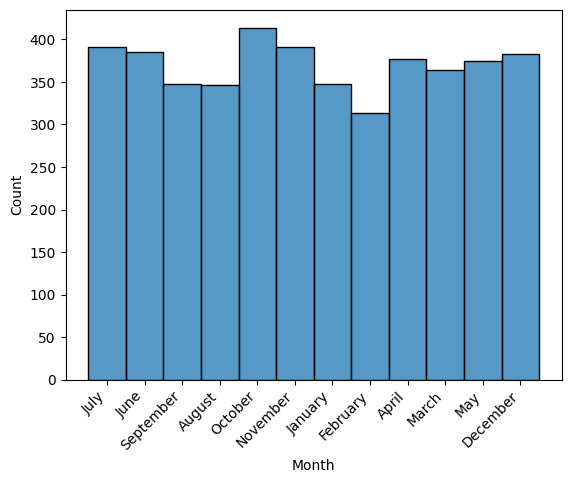

In [ ]:
# Histogram of Incidents by Year
#Uses the histplot of the Seaborn Library
vf = sns.histplot(df['Month'])
x_labels = vf.get_xticklabels()
vf.set_xticklabels(x_labels, rotation=45, ha="right")

**Missing Columns**

In [ ]:
#replaces the blank entries with NaN
df.replace(' ', np.nan, inplace=True)

#Prints the number of columns for each attribute that is missing
print(df.isnull().sum())

Year                             0
Month                            0
IncType                          0
ParentPropertyType               0
NumFireDeaths                    0
NumAllFireInjuries               0
IncGeo_BoroughCode               0
IncGeo_BoroughName               0
IncGeo_WardCode                  0
IncGeo_WardName                  0
IgnitionSourcePower              0
IgnitionSource                   0
ItemFirstIgnited                 0
LocationFireStarted              0
ApplianceManufacturer          485
ApplianceManufacturerOther    3928
MainCauseModel                 553
dtype: int64


**Get Columns in data**

In [ ]:
columns = df.columns
print(columns)

Index(['Year', 'Month', 'IncType', 'ParentPropertyType', 'NumFireDeaths',
       'NumAllFireInjuries', 'IncGeo_BoroughCode', 'IncGeo_BoroughName',
       'IncGeo_WardCode', 'IncGeo_WardName', 'IgnitionSourcePower',
       'IgnitionSource', 'ItemFirstIgnited', 'LocationFireStarted',
       'ApplianceManufacturer', 'ApplianceManufacturerOther',
       'MainCauseModel'],
      dtype='object')


**Create a new column named "NumPeopleAffected" from "NumFireDeaths" and "NumAllFireInjuries"**

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df' containing the fire incident data

# Check if either NumFireDeaths or NumAllFireInjuries is more than 0
df['NumPeopleAffected'] = 0
df.loc[(df['NumFireDeaths'] > 0) | (df['NumAllFireInjuries'] > 0), 'NumPeopleAffected'] = 1



**Reorder the Columns**

In [ ]:
# Reorder the columns to have 'NumPeopleAffected' beside 'NumAllFireInjuries'
df = df[['Year', 'Month', 'IncType', 'ParentPropertyType', 'NumFireDeaths',
         'NumAllFireInjuries', 'NumPeopleAffected', 'IncGeo_BoroughCode', 
         'IncGeo_BoroughName', 'IncGeo_WardCode', 'IncGeo_WardName', 
         'IgnitionSourcePower', 'IgnitionSource', 'ItemFirstIgnited', 
         'LocationFireStarted', 'ApplianceManufacturer', 
         'ApplianceManufacturerOther', 'MainCauseModel']]

# Print the updated DataFrame
print(df)

      Year      Month       IncType               ParentPropertyType  \
0     2009       July  Primary Fire  Purpose Built Flats/Maisonettes   
1     2009       July  Primary Fire  Purpose Built Flats/Maisonettes   
2     2009       June  Primary Fire  Purpose Built Flats/Maisonettes   
3     2009       July  Primary Fire  Purpose Built Flats/Maisonettes   
4     2009  September  Primary Fire  Purpose Built Flats/Maisonettes   
...    ...        ...           ...                              ...   
4432  2022       June  Primary Fire  Purpose Built Flats/Maisonettes   
4433  2022        May  Primary Fire  Purpose Built Flats/Maisonettes   
4434  2022        May  Primary Fire  Purpose Built Flats/Maisonettes   
4435  2022    January  Primary Fire  Purpose Built Flats/Maisonettes   
4436  2022        May  Primary Fire  Purpose Built Flats/Maisonettes   

      NumFireDeaths  NumAllFireInjuries  NumPeopleAffected IncGeo_BoroughCode  \
0                 0                   0               

In [ ]:
df.to_csv("new_file.csv", index=False)

**Calculate Correlation**

<ipython-input-9-0cc45139395a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_corr = df.corr()["NumPeopleAffected"]


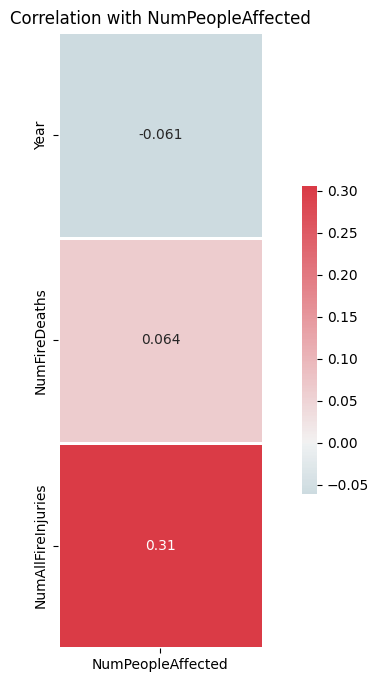

In [ ]:
target_corr = df.corr()["NumPeopleAffected"]
target_corr = target_corr.drop("NumPeopleAffected")

fig, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(target_corr.to_frame(), cmap=cmap, center=0, square=True, linewidths=.9, annot=True, cbar_kws={"shrink": .5})

plt.title("Correlation with NumPeopleAffected")
plt.show()

**Chi-Squared Test**

In [ ]:
from scipy.stats import chi2_contingency
# Calculate the chi-square test for categorical variables
cat_vars = ['Month', 'IncType', 'IncGeo_BoroughName', 'ParentPropertyType','IncGeo_WardName', 'IncGeo_WardCode',
            'IncGeo_BoroughCode', 'IgnitionSourcePower', 'IgnitionSource',
            'ItemFirstIgnited', 'LocationFireStarted', 'ApplianceManufacturer',
            'MainCauseModel']
chi2_values = []
for var in cat_vars:
    contingency_table = pd.crosstab(df[var], df['NumPeopleAffected'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_values.append(chi2)

# Print the chi-square test results
print(pd.DataFrame({'Variable': cat_vars, 'Chi-Square': chi2_values}))

                 Variable   Chi-Square
0                   Month    16.005592
1                 IncType     0.000000
2      IncGeo_BoroughName    68.037541
3      ParentPropertyType    48.606329
4         IncGeo_WardName   814.647608
5         IncGeo_WardCode   658.826954
6      IncGeo_BoroughCode    27.810348
7     IgnitionSourcePower     1.033020
8          IgnitionSource   154.148583
9        ItemFirstIgnited    40.606401
10    LocationFireStarted    69.459842
11  ApplianceManufacturer   134.041627
12         MainCauseModel  2387.570695


**Remove Unwanted Columns**

In [ ]:
del_columns = ['Year','IncType', 'IgnitionSourcePower', 'Month','ApplianceManufacturerOther',
               'IncGeo_WardName', 'IncGeo_WardCode','IncGeo_BoroughCode', 'MainCauseModel']

df = df.drop(del_columns, axis=1)
df.head()

,ParentPropertyType,NumFireDeaths,NumAllFireInjuries,NumPeopleAffected,IncGeo_BoroughName,IgnitionSource,ItemFirstIgnited,LocationFireStarted,ApplianceManufacturer
0,Purpose Built Flats/Maisonettes,0,0,0,Lambeth,Tumble dryer - Standard,Other textiles,Kitchen,NaN
1,Purpose Built Flats/Maisonettes,0,0,0,Camden,Fridge/Freezer,Other item,Kitchen,BOSCH
2,Purpose Built Flats/Maisonettes,0,1,1,Havering,Fridge/Freezer,Plastic - raw material only,Corridor/Hall,BEJAM
3,Purpose Built Flats/Maisonettes,0,0,0,Hammersmith and Fulham,Washing machine,Plastic - raw material only,Kitchen,BEKO
4,Purpose Built Flats/Maisonettes,0,0,0,Wandsworth,Tumble dryer - Standard,Not known,Kitchen,INDESIT


**Save the data frame to csv**

In [ ]:
df.to_csv("new_file.csv", index=False)

**Read the csv**

In [ ]:
df = pd.read_csv('/content/new_file.csv')

**Look for Null Values**

In [ ]:
df.isnull().sum()

ParentPropertyType         0
NumFireDeaths              0
NumAllFireInjuries         0
NumPeopleAffected          0
IncGeo_BoroughName         0
IgnitionSource             0
ItemFirstIgnited           0
LocationFireStarted        0
ApplianceManufacturer    485
dtype: int64

**Replace Blank with 'Other' in ApplianceManufacturer**

In [ ]:
# Assuming you have a DataFrame called 'df' containing your data
df['ApplianceManufacturer'] = df['ApplianceManufacturer'].fillna('Other')

**Replace "Null" with 'Other' in ApplianceManufacturer**

In [ ]:
# Assuming you have a DataFrame called 'df' containing your data
df['ApplianceManufacturer'] = df['ApplianceManufacturer'].replace('Null', 'Other')

**Borough Name value count**

In [ ]:
print(df['IncGeo_BoroughName'].value_counts())

BARNET                  119
Croydon                 116
CROYDON                 114
LAMBETH                 107
Barnet                  106
                       ... 
Richmond upon Thames     40
RICHMOND UPON THAMES     31
KINGSTON UPON THAMES     28
City of London            9
CITY OF LONDON            9
Name: IncGeo_BoroughName, Length: 66, dtype: int64


**Changing Case**

In [ ]:
df['IncGeo_BoroughName'] = df['IncGeo_BoroughName'].str.title()

**Borough name value count to confirm**

In [ ]:
print(df['IncGeo_BoroughName'].value_counts())

Croydon                   230
Barnet                    225
Southwark                 181
Lambeth                   179
Lewisham                  175
Ealing                    173
Westminster               170
Wandsworth                168
Bromley                   158
Enfield                   151
Hillingdon                150
Hackney                   149
Brent                     140
Tower Hamlets             137
Greenwich                 137
Hounslow                  132
Haringey                  130
Waltham Forest            128
Bexley                    127
Islington                 125
Redbridge                 125
Newham                    124
Hammersmith And Fulham    118
Havering                  117
Harrow                    109
Camden                    109
Sutton                    106
Barking And Dagenham      104
Kensington And Chelsea    104
Merton                     88
Kingston Upon Thames       79
Richmond Upon Thames       71
City Of London             18
Name: IncG

**Data Exploration**

**Borough counts by death**

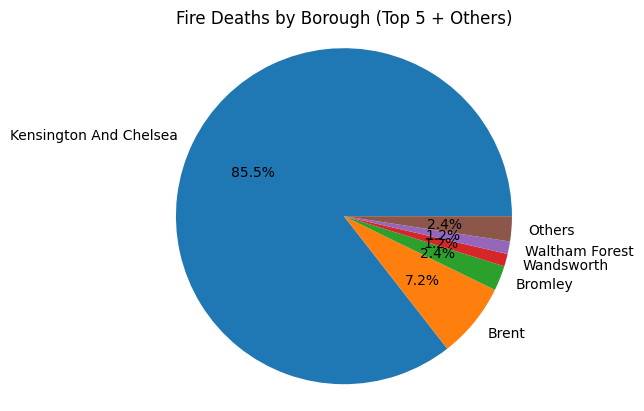

In [ ]:
# Group the dataframe by 'IncGeo_BoroughName' and calculate the sum of 'NumFireDeaths' for each borough
borough_deaths = df.groupby('IncGeo_BoroughName')['NumFireDeaths'].sum()

# Sort the borough_deaths series in descending order
borough_deaths = borough_deaths.sort_values(ascending=False)

# Select the top 5 boroughs and sum the remaining boroughs as 'Others'
top_5 = borough_deaths[:5]
others = borough_deaths[5:].sum()

# Create a new series combining the top 5 and 'Others'
combined = pd.concat([top_5, pd.Series({'Others': others})])

# Plot the pie chart
plt.pie(combined, labels=combined.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Fire Deaths by Borough (Top 5 + Others)')

# Display the chart
plt.show()

**Plot the number of injuries by borough**

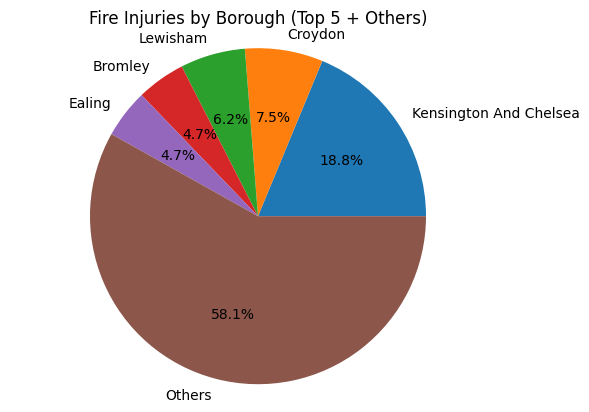

In [ ]:
# Group the dataframe by 'IncGeo_BoroughName' and calculate the sum of 'NumAllFireInjuries' for each borough
borough_injuries = df.groupby('IncGeo_BoroughName')['NumAllFireInjuries'].sum()

# Sort the borough_injuries series in descending order
borough_injuries = borough_injuries.sort_values(ascending=False)

# Select the top 5 boroughs and sum the remaining boroughs as 'Others'
top_5 = borough_injuries[:5]
others = borough_injuries[5:].sum()

# Create a new series combining the top 5 and 'Others'
combined = pd.concat([top_5, pd.Series({'Others': others})])

# Plot the pie chart
plt.pie(combined, labels=combined.index, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Fire Injuries by Borough (Top 5 + Others)')

# Display the chart
plt.show()

**Histogram of Boroughs**

<ipython-input-24-2d011e70e7c0>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  vf.set_xticklabels(x_labels, rotation=45, ha="right")


[Text(0, 0, 'Lambeth'),
 Text(1, 0, 'Camden'),
 Text(2, 0, 'Havering'),
 Text(3, 0, 'Hammersmith And Fulham'),
 Text(4, 0, 'Wandsworth'),
 Text(5, 0, 'Waltham Forest'),
 Text(6, 0, 'Westminster'),
 Text(7, 0, 'Kingston Upon Thames'),
 Text(8, 0, 'Tower Hamlets'),
 Text(9, 0, 'Ealing'),
 Text(10, 0, 'Croydon'),
 Text(11, 0, 'Haringey'),
 Text(12, 0, 'Islington'),
 Text(13, 0, 'Hounslow'),
 Text(14, 0, 'Bexley'),
 Text(15, 0, 'Harrow'),
 Text(16, 0, 'Barking And Dagenham'),
 Text(17, 0, 'Lewisham'),
 Text(18, 0, 'Greenwich'),
 Text(19, 0, 'Hackney'),
 Text(20, 0, 'Enfield'),
 Text(21, 0, 'Newham'),
 Text(22, 0, 'Southwark'),
 Text(23, 0, 'Barnet'),
 Text(24, 0, 'Kensington And Chelsea'),
 Text(25, 0, 'Brent'),
 Text(26, 0, 'Hillingdon'),
 Text(27, 0, 'Bromley'),
 Text(28, 0, 'Redbridge'),
 Text(29, 0, 'Sutton'),
 Text(30, 0, 'Richmond Upon Thames'),
 Text(31, 0, 'City Of London'),
 Text(32, 0, 'Merton')]

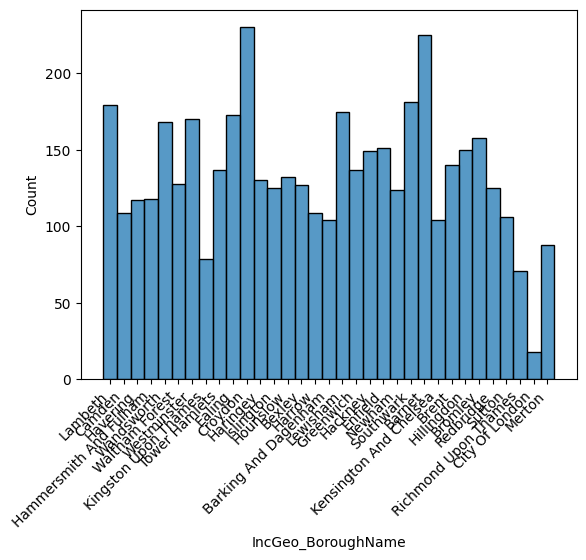

In [ ]:
# Histogram of IncGeo_BoroughName
vf = sns.histplot(df['IncGeo_BoroughName'])
x_labels = vf.get_xticklabels()
vf.set_xticklabels(x_labels, rotation=45, ha="right")

**Histogram of Ignition Source**

<ipython-input-25-955bc441fa03>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  vf.set_xticklabels(x_labels, rotation=45, ha="right")


[Text(0, 0, 'Tumble dryer - Standard'),
 Text(1, 0, 'Fridge/Freezer'),
 Text(2, 0, 'Washing machine'),
 Text(3, 0, 'Washer/Dryer combined'),
 Text(4, 0, 'Spin dryer'),
 Text(5, 0, 'Dishwasher'),
 Text(6, 0, 'Fridge - Freestanding'),
 Text(7, 0, 'Freezer - Freestanding'),
 Text(8, 0, 'Fridge/Freezer - Freestanding'),
 Text(9, 0, 'Fridge/Freezer - Integrated'),
 Text(10, 0, 'Fridge - Integrated'),
 Text(11, 0, 'Freezer - Integrated'),
 Text(12, 0, 'Tumble dryer - Condensing')]

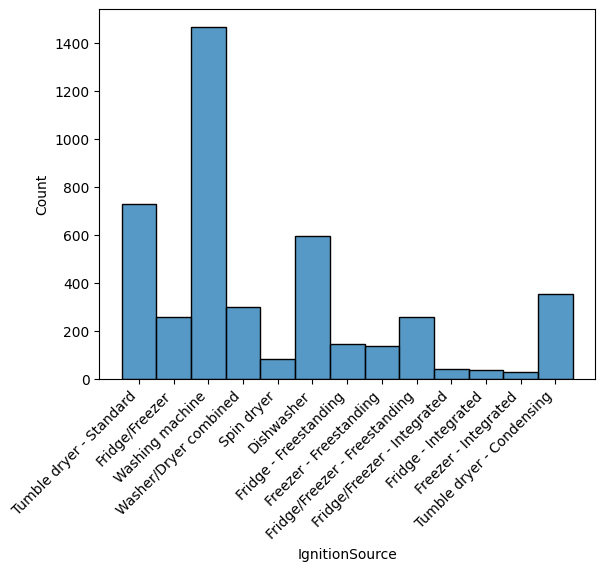

In [ ]:
# Histogram of IncGeo_BoroughName
vf = sns.histplot(df['IgnitionSource'])
x_labels = vf.get_xticklabels()
vf.set_xticklabels(x_labels, rotation=45, ha="right")

**Pie Chart of Appliance Manufacturer**

<ipython-input-26-255fb8ac5cd2>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_values_df = top_values_df.append({'Values': 'All Others', 'Count': other_count}, ignore_index=True)


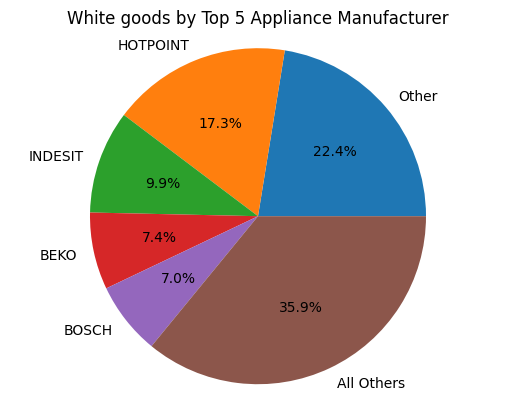

In [ ]:
#Count the occurrences of each value in the column and select the top 5 values
top_values = df['ApplianceManufacturer'].value_counts().head(5)

#Create a new DataFrame to store the top 5 values and their counts
top_values_df = pd.DataFrame({'Values': top_values.index, 'Count': top_values.values})

#Calculate the sum of counts for the remaining values
other_count = df['ApplianceManufacturer'].value_counts().sum() - top_values_df['Count'].sum()

#Create a new row in the DataFrame for the "Others" category
top_values_df = top_values_df.append({'Values': 'All Others', 'Count': other_count}, ignore_index=True)

#Create a pie chart using matplotlib
plt.pie(top_values_df['Count'], labels=top_values_df['Values'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('White goods by Top 5 Appliance Manufacturer')
plt.show()


**One Hot Encoding**

In [ ]:
# Select the columns to be one-hot encoded
columns_to_encode = ['ParentPropertyType', 'IncGeo_BoroughName', 'IgnitionSource', 
                   'ItemFirstIgnited', 'LocationFireStarted', 'ApplianceManufacturer']

# Perform one-hot encoding using Pandas get_dummies() method
encoded_columns = pd.get_dummies(df[columns_to_encode], prefix=columns_to_encode)

# Drop the original columns from the DataFrame
df = df.drop(columns_to_encode, axis=1)

# Concatenate the original DataFrame with the one-hot encoded columns
df_encoded = pd.concat([df, encoded_columns], axis=1)

**Save the final to a new csv**



In [ ]:
df_encoded.to_csv("final_clean.csv", index=False)

**Import the Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

**Read the csv**

In [ ]:
df = pd.read_csv('final_clean.csv')

**Undersample the data**

In [ ]:
# Separate the minority and majority classes
minority_class = df[df['NumPeopleAffected'] == 1]
majority_class = df[df['NumPeopleAffected'] == 0]

# Undersample the majority class
undersampled_majority = resample(majority_class,
                                 replace=False,  # Set to False for undersampling
                                 n_samples=len(minority_class),  # Match the number of minority samples
                                 random_state=42)  # Set a random seed for reproducibility

# Combine the minority class and undersampled majority class
undersampled_df = pd.concat([undersampled_majority, minority_class])

# Split the undersampled dataset into features (X) and target variable (y)
X = undersampled_df.drop('NumPeopleAffected', axis=1)
y = undersampled_df['NumPeopleAffected']

**Split into training and testing datasets**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Random Forest Classifier**

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

#AUC and ROC 
rfc_auc = roc_auc_score(y_test, y_pred)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, y_pred)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9918032786885246
Precision: 0.98
Recall: 1.0
F1-score: 0.98989898989899


**Classification Report**

In [ ]:
# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.98      1.00      0.99        49

    accuracy                           0.99       122
   macro avg       0.99      0.99      0.99       122
weighted avg       0.99      0.99      0.99       122



**Confusion Matrix**

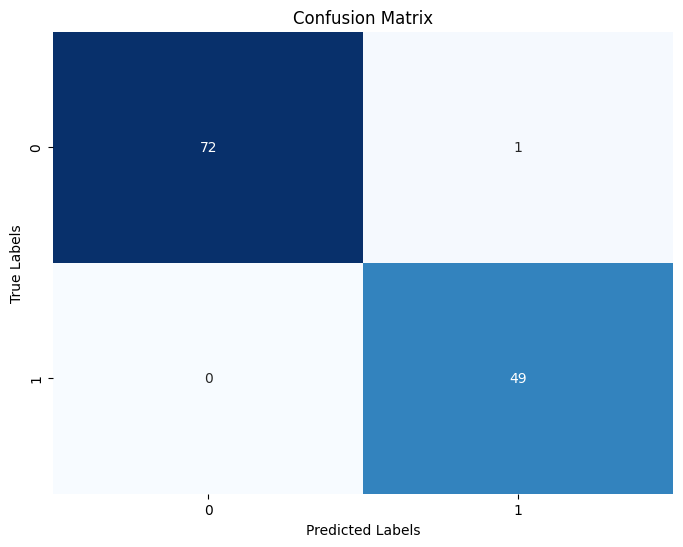

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**The ROC Curve**

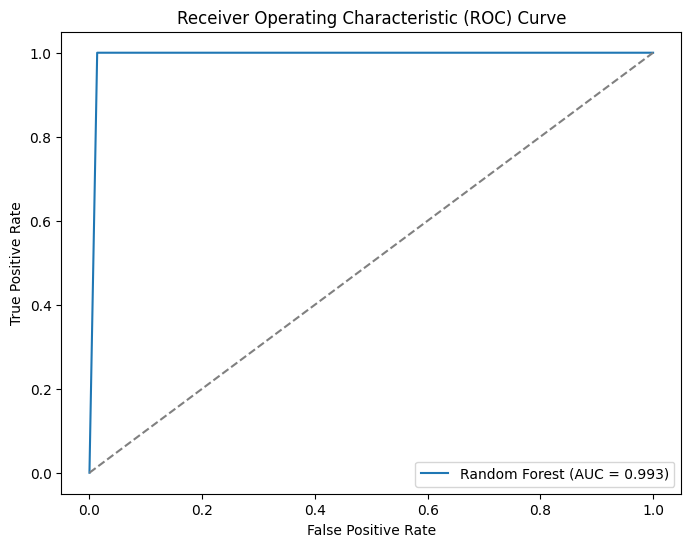

In [ ]:
# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(rfc_fpr, rfc_tpr, label='Random Forest (AUC = {:.3f})'.format(rfc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**Unsupervised Model**

**Import Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

**Import the csv**

In [ ]:
df = pd.read_csv('new_file.csv')

**Label Encode the Categorical Variables**

In [ ]:
# Select the columns to be label encoded
columns_to_encode = ['ParentPropertyType', 'IncGeo_BoroughName', 'IgnitionSource',
                     'ItemFirstIgnited', 'LocationFireStarted', 'ApplianceManufacturer']

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate over the selected columns and perform label encoding
for column in columns_to_encode:
    # Fit the label encoder on the column's values and transform the column
    df[column] = label_encoder.fit_transform(df[column])

# Save the modified DataFrame back to a CSV file
df.to_csv('encoded_file.csv', index=False)


**Load the encoded data**

In [ ]:
df = pd.read_csv('encoded_file.csv')

**Implement the Clusters**

In [ ]:
# Selecting the columns 
columns = ['IgnitionSource', 'LocationFireStarted','NumPeopleAffected']

# Preprocess the data by scaling the features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df[columns])

# Determine the optimal number of clusters using the elbow method
distortions = []
silhouette_scores = []
for i in range(4, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Based on the elbow curve and silhouette score, choose the appropriate number of clusters
num_clusters = 10

# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(data_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)

# Print the resulting clusters
print(df[['NumPeopleAffected', 'Cluster']])
print(f"Silhouette Score: {silhouette_avg}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

      NumPeopleAffected  Cluster
0                     0        5
1                     0        4
2                     1        2
3                     0        0
4                     0        5
...                 ...      ...
4432                  0        1
4433                  0        5
4434                  0        0
4435                  0        0
4436                  0        0

[4437 rows x 2 columns]
Silhouette Score: 0.7078928732935714


**Elbow Curve**

Text(0.5, 1.0, 'Elbow Curve')

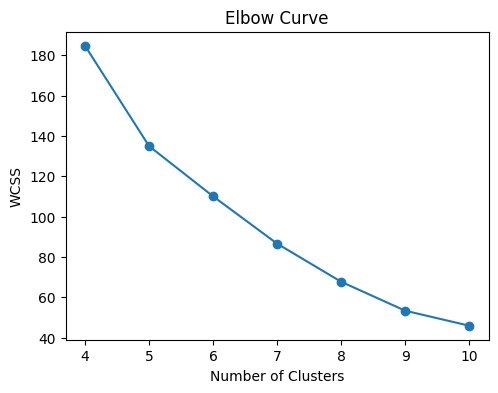

In [ ]:
# Plot the elbow curve to identify the optimal number of clusters
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(4, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')

**Silhouette Score Plot**

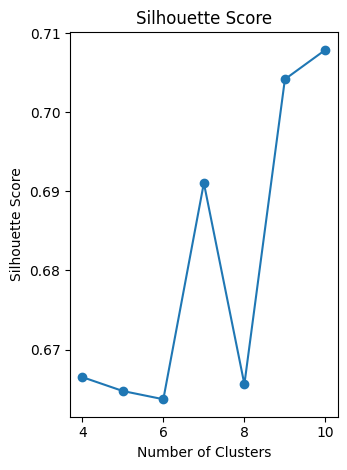

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(range(4, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.tight_layout()
plt.show()

**Cluster Plot**

Text(0.5, 0.92, 'Cluster Plot')

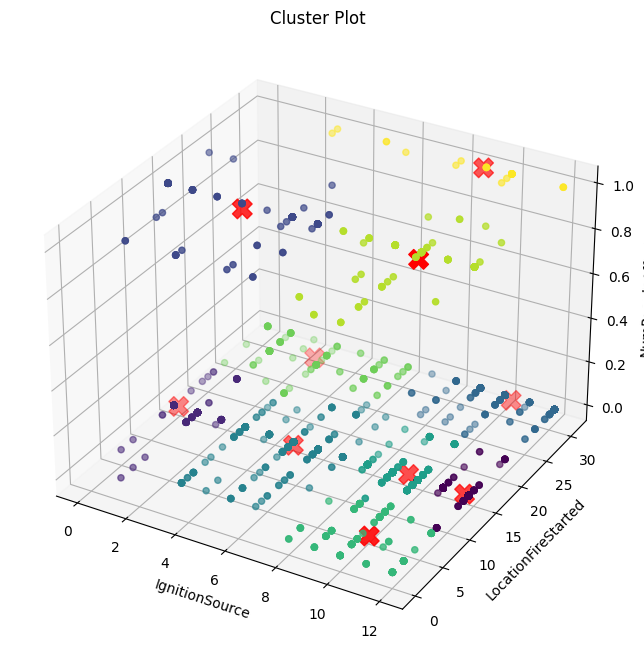

In [ ]:
# Perform a 3D cluster plot using three axes of the dataset
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='red', s=200, marker='X', label='Cluster Centers')

ax.scatter(df['IgnitionSource'], df['LocationFireStarted'], df['NumPeopleAffected'], c=df['Cluster'])

ax.set_xlabel('IgnitionSource')
ax.set_ylabel('LocationFireStarted')
ax.set_zlabel('NumPeopleAffected')
ax.set_title('Cluster Plot')
